In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage.filters import try_all_threshold

img=mpimg.imread('cropped_Wild018.tif')
original_img = img[:,:,0]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


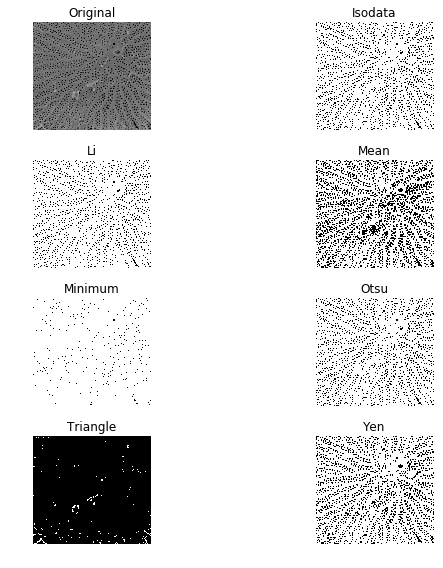

In [2]:
fig, ax = try_all_threshold(original_img, figsize=(10, 8), verbose=False)
plt.show()
#mean seems to work pretty well on this one
#yen looks ok, but it looks better on others

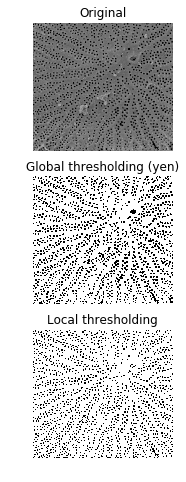

In [3]:
#change the block size or offset to make it work better? 
#we tried both but it didn't seem to help


from skimage.filters import threshold_yen, threshold_local

global_thresh = threshold_yen(original_img)
binary_global = original_img > global_thresh

block_size = 23
local_thresh = threshold_local(original_img, block_size, offset=10)
binary_local = original_img > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(original_img)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding (yen)')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()


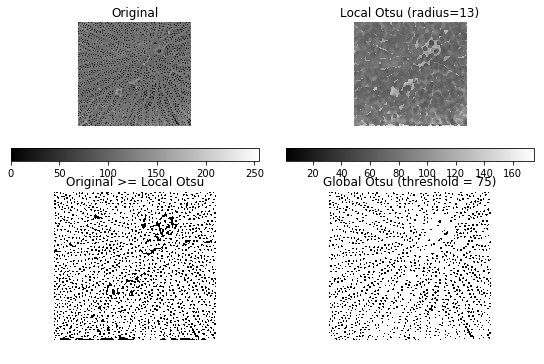

In [4]:
#so this does look better when you zoom out but there are way too many dots
#local also takes longer

from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
img = img_as_ubyte(original_img)

radius = 13
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()

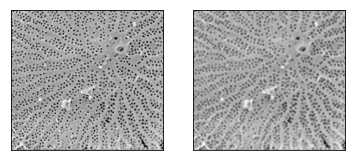

In [5]:
#trying different types of blurring: Gaussian (g), median blur (m), and averaging (a)
import cv2
gblur = cv2.GaussianBlur(original_img,(11,11),0)
mblur = cv2.medianBlur(original_img,11)
ablur = cv2.blur(original_img,(11, 11)) 

plt.subplot(121),plt.imshow(gblur)
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ablur)
plt.xticks([]), plt.yticks([])

plt.show()

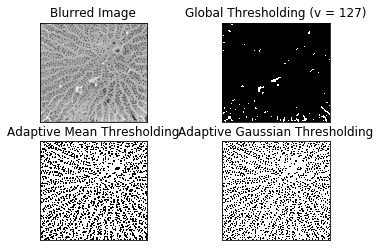

In [6]:
#from http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.GaussianBlur(original_img,(15,15),0)
img = cv2.blur(original_img,(11, 11))
#img = cv2.medianBlur(original_img,15)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,31,5)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,31,5)

titles = ["Blurred Image", 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

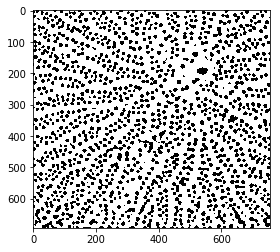

In [7]:
#don't use this one

gblur = cv2.GaussianBlur(original_img,(17,17),0)
g_mthres = cv2.adaptiveThreshold(gblur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,31,5)
#g_Gthres = cv2.adaptiveThreshold(gblur,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,31,5)
thresholds = plt.subplot()
thresholds.imshow(g_mthres) 
plt.show()

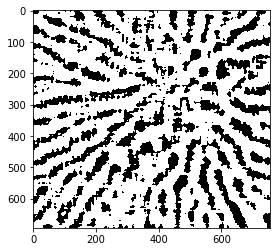

In [8]:
#mthres seems to work better than gthres
ablur = cv2.blur(original_img,(30, 30))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,79,3)
#a_Gthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
           # cv2.THRESH_BINARY,31,5)
thresholds = plt.subplot()
thresholds.imshow(a_mthres) 
plt.show()

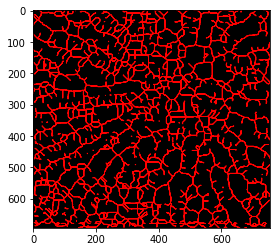

In [9]:
from skimage.morphology import skeletonize
skeleton = skeletonize(a_mthres)
ax = plt.subplot()
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
ax.imshow(skeleton, cmap=red2, interpolation= 'bilinear')

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


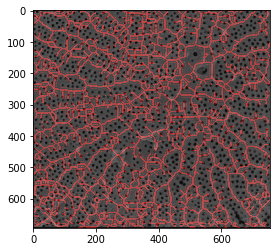

In [10]:
img=mpimg.imread('cropped_Wild018.tif')
imgplot = plt.imshow(img, alpha=0.9)
ax = plt.subplot()
ax.imshow(skeleton, cmap=red2, interpolation='sinc', alpha=.42) 
plt.show()

In [19]:
# Import our numerical workhorse
import numpy as np

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt

# Import the important modules for image processing.
import scipy.ndimage
import skimage.io
import skimage.segmentation
import skimage.morphology

# Some pretty Seaborn settings
import seaborn as sns
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}